In [2]:
# ARIMA Forecasting on Soybean Oil Production to 2025, and Honey Production Prediction for 2023
## Sara Slocum

In [3]:
import pandas as pd
import numpy as np
import pmdarima as pm
from pmdarima.arima import auto_arima
from pmdarima.arima import ADFTest
import matplotlib.pyplot as plt
from matplotlib import pyplot
from math import sqrt
from numpy import split
from numpy import array
import statsmodels
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sympy.solvers import solve
from sympy import Symbol

In [4]:
# Importing dataframe
Global = pd.read_csv("C:/Users/saslo/Data_Science/DS_Portfolio/Queen_Bees/Datasets/Wrangled_Data/pivotedGlobal.csv")

Global

,Unnamed: 0,Year,"Almonds, Shelled Basis","Apples, Fresh",Barley,"Coffee, Green",Corn,"Dairy, Milk, Fluid","Grapefruit, Fresh","Meat, Swine",Oats,"Oil, Soybean","Oilseed, Rapeseed",Rye,"Walnuts, Inshell Basis"
0,0,1998,235884.0,5282724.0,2.358840e+08,1.415304e+07,4.822010e+09,3.261510e+08,1.850000e+05,4.740312e+12,2.478820e+08,4.176508e+09,5.214000e+06,2.114000e+06,205931.0
1,1,1999,377800.0,5746060.0,3.613620e+08,2.168172e+07,4.800686e+09,7.753400e+07,1.830000e+05,4.476775e+12,2.395490e+08,3.797778e+09,6.622500e+08,2.165000e+06,256734.0
2,2,2000,318900.0,5675890.0,3.037000e+08,1.822200e+07,4.274204e+09,3.320920e+08,1.630000e+05,2.395490e+11,2.518540e+08,3.946939e+09,3.073860e+08,1.707000e+06,216816.0
3,3,2001,376500.0,5065060.0,3.764880e+08,2.258928e+07,3.866379e+09,3.053190e+08,1.630000e+05,2.518540e+11,2.413770e+08,4.354875e+09,3.121800e+08,1.684000e+06,276700.0
4,4,2002,494416.0,4605810.0,4.944160e+08,2.686065e+11,3.988483e+09,8.358100e+07,1.860000e+05,3.871860e+11,2.277670e+08,4.433333e+09,3.320920e+08,2.096000e+06,255825.0
5,5,2003,471740.0,4780600.0,4.585820e+08,2.775984e+10,4.740312e+09,8.782000e+06,1.460000e+05,5.282724e+12,2.562780e+08,4.113333e+09,3.066520e+08,3.320920e+08,295741.0
6,6,2004,462664.0,5683040.0,4.626640e+08,2.323116e+10,4.476775e+09,9.331000e+06,4.463810e+09,3.037000e+11,2.999140e+08,4.287885e+09,5.080200e+08,9.335000e+06,294834.0
7,7,2005,415040.0,5261960.0,3.871860e+08,2.168172e+10,4.734966e+09,9.247000e+06,8.781000e+06,4.822010e+12,2.822600e+08,4.183484e+09,8.028600e+07,4.585820e+08,322100.0
8,8,2006,508023.0,5351610.0,5.282724e+09,3.169634e+11,4.473878e+09,3.610910e+08,9.392000e+06,4.800686e+12,2.957410e+08,4.227338e+09,6.304900e+08,4.699002e+09,317515.0
9,9,2007,630500.0,4154195.0,4.780600e+09,2.880412e+11,4.408118e+09,3.454860e+08,3.290590e+08,4.274204e+12,4.567846e+09,4.150400e+08,6.804000e+08,4.354875e+09,297600.0


In [5]:
# Isolating almonds for ARIMA
justsoybeanoil = Global[['Year', 'Oil, Soybean']]
justsoybeanoil

,Year,"Oil, Soybean"
0,1998,4.176508e+09
1,1999,3.797778e+09
2,2000,3.946939e+09
3,2001,4.354875e+09
4,2002,4.433333e+09
5,2003,4.113333e+09
6,2004,4.287885e+09
7,2005,4.183484e+09
8,2006,4.227338e+09
9,2007,4.150400e+08


In [6]:
# Formatting Year to date datatype 
justsoybeanoil['Year'] = pd.to_datetime(justsoybeanoil['Year'], format='%Y')

C:\Users\saslo\AppData\Local\Temp/ipykernel_32856/3738970556.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  justsoybeanoil['Year'] = pd.to_datetime(justsoybeanoil['Year'], format='%Y')


In [7]:
# Setting Year as index
justsoybeanoil.set_index('Year', inplace=True)
type(justsoybeanoil)

pandas.core.frame.DataFrame

<AxesSubplot:xlabel='Year'>

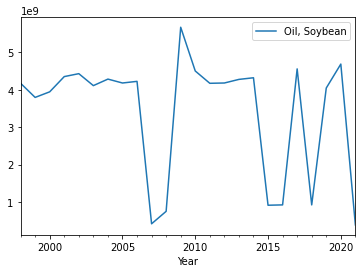

In [8]:
justsoybeanoil.plot()

In [9]:
### Linear plot looks like it might be stationary.

In [10]:
## Testing our finding against Augmented Dickey Fuller test
result=adfuller(justsoybeanoil['Oil, Soybean'], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -2.791662314279511
n_lags: 0.059474652441029625
p-value: 0.059474652441029625
Critial Values:
   1%, -3.859073285322359
Critial Values:
   5%, -3.0420456927297668
Critial Values:
   10%, -2.6609064197530863


In [11]:
### It is right at the .05 level, but slightly over, so we will conlclude that our data is non-stationary.

In [12]:
# Splitting the data for training and testing
train = justsoybeanoil[:20]
test = justsoybeanoil[-4:]
train
test

,"Oil, Soybean"
Year,
2018-01-01,9.207930e+08
2019-01-01,4.048993e+09
2020-01-01,4.690101e+09
2021-01-01,3.847780e+08


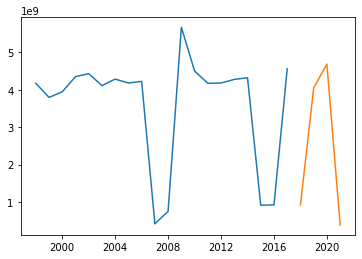

In [13]:
plt.plot(train)
plt.plot(test)

In [14]:
## Running auto_arima to obtain p, d, q variables
model = pm.auto_arima(justsoybeanoil['Oil, Soybean'], seasonal=False)
model

ARIMA(order=(0, 0, 0), scoring_args={}, suppress_warnings=True)

In [15]:
### Our auto arima states that no differencing is required although non-stationary. Interesting. Lets dig deeper...

In [46]:
# Manually Building Auto ARIMA model
arima_model =  auto_arima(train,start_p=0, d=0, start_q=0, 
                          max_p=5, max_d=5, max_q=5, start_P=0, 
                          D=0, start_Q=0, max_P=5, max_D=5,
                          max_Q=5, m=12, seasonal=True, 
                          error_action='warn',trace = True,
                          supress_warnings=True,stepwise = True,
                          random_state=20,n_fits = 50 )

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=905.281, Time=0.00 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=908.218, Time=0.04 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=903.643, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=942.141, Time=0.00 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=901.844, Time=0.01 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=903.589, Time=0.04 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=905.536, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=902.778, Time=0.02 sec
 ARIMA(0,0,2)(0,0,0)[12] intercept   : AIC=904.024, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=906.223, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[12] intercept   : AIC=905.803, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[12]             : AIC=931.380, Time=0.01 sec

Best model:  ARIMA(0,0,1)(0,0,0)[12] intercept
Total fit time: 0.243 seconds


In [47]:
### When seasonality is set to true, our order looks like p=0, d=0, q=1

In [48]:
#Summary of the model
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   20
Model:               SARIMAX(0, 0, 1)   Log Likelihood                -447.922
Date:                Mon, 18 Jul 2022   AIC                            901.844
Time:                        14:02:35   BIC                            904.831
Sample:                             0   HQIC                           902.427
                                 - 20                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3.448e+09    4.5e-11   7.66e+19      0.000    3.45e+09    3.45e+09
ma.L1          0.9291      0.333      2.786      0.005       0.276       1.583
sigma2       2.02e+18   1.08e-19   1.87e+37      0.000    2.02e+18    2.02e+18
===================================================================================
Ljung-Box (L1) (Q):                   0.50   Jarque-Bera (JB):                14.58
Prob(Q):                              0.48   Prob(JB):                         0.00
Heteroskedasticity (H):               7.26   Skew:                            -1.61
Prob(H) (two-sided):                  0.02   Kurtosis:                         5.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.26e+52. Standard errors may be unstable.
"""

In [49]:
# Forecasting on the test data
prediction = pd.DataFrame(arima_model.predict(n_periods = 4),index=test.index)
prediction.columns = ['predicted_values']
prediction

,predicted_values
Year,
2018-01-01,4.781234e+09
2019-01-01,3.448380e+09
2020-01-01,3.448380e+09
2021-01-01,3.448380e+09


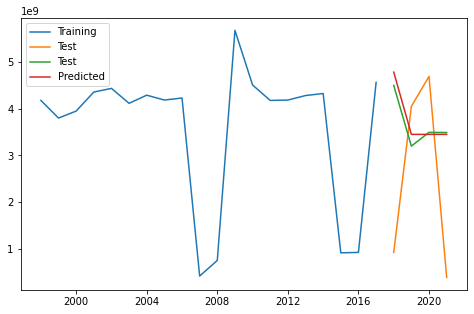

In [50]:
# Plotting against actual values
plt.figure(figsize=(8,5))
plt.plot(train,label="Training")
plt.plot(test,label="Test")
plt.plot(prediction,label="Predicted")
plt.legend(loc = 'best')
plt.show()

In [51]:
# Looking at R2 score
test['predicted_values'] = prediction
r2_score(test['Oil, Soybean'], test['predicted_values'])

C:\Users\saslo\AppData\Local\Temp/ipykernel_32856/3384924645.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predicted_values'] = prediction


-0.849211167345105

In [52]:
### Our number is not very close to 0, and as we can see in the graph above, our prediction model did not pair well with our actual test data.

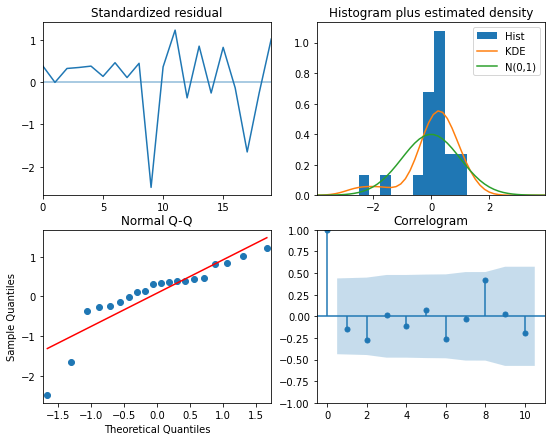

In [53]:
# Interpreting residual plots
arima_model.plot_diagnostics(figsize=(9,7))
plt.show()

In [54]:
# Creating new dataframe for future forecasting
future = {'Year':  [2022, 2023, 2024, 2025],
        'predicted_values': ['NaN', 'NaN', 'NaN', 'NaN']}

future = pd.DataFrame(future)
print (future)

   Year predicted_values
0  2022              NaN
1  2023              NaN
2  2024              NaN
3  2025              NaN


In [55]:
# Formatting Year to date datatype 
future['Year'] = pd.to_datetime(future['Year'], format='%Y')

In [56]:
## Setting Year as index
future.set_index('Year', inplace=True)
type(future)
future

,predicted_values
Year,
2022-01-01,NaN
2023-01-01,NaN
2024-01-01,NaN
2025-01-01,NaN


In [57]:
# Appending Future DF to justalmonds DF
futureprediction = justsoybeanoil.append(future)
futureprediction

,"Oil, Soybean",predicted_values
Year,,
1998-01-01,4.176508e+09,NaN
1999-01-01,3.797778e+09,NaN
2000-01-01,3.946939e+09,NaN
2001-01-01,4.354875e+09,NaN
2002-01-01,4.433333e+09,NaN
2003-01-01,4.113333e+09,NaN
2004-01-01,4.287885e+09,NaN
2005-01-01,4.183484e+09,NaN
2006-01-01,4.227338e+09,NaN


In [58]:
# Setting number of points to forecast
h=28
# Generating forecast
forecast2 = pd.DataFrame(arima_model.predict(h), index=futureprediction.index)
forecast2.columns = ['predicted_values']
forecast2

,predicted_values
Year,
1998-01-01,4.781234e+09
1999-01-01,3.448380e+09
2000-01-01,3.448380e+09
2001-01-01,3.448380e+09
2002-01-01,3.448380e+09
2003-01-01,3.448380e+09
2004-01-01,3.448380e+09
2005-01-01,3.448380e+09
2006-01-01,3.448380e+09


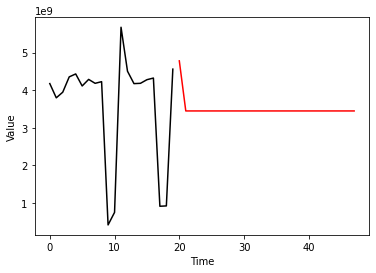

In [59]:
# Visualize forecast with training data
time = np.arange(train.shape[0] + h)

# Slice the x-axis to only plot the training data as the color black
plt.plot(time[:train.shape[0]], train, c = 'black')

# Slice the x-axis to plot our forecast after the training data as the color red
plt.plot(time[train.shape[0]:], forecast2, c = 'red')

# Set axis labels
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

In [61]:
### Soybean Oil = -32.06(Honey) + 11,290,000
### 2023 Soybean Oil Prediction = 3.448380e+09
### 3.448380e+09 = -32.06(Honey) + 11,290,000
### 3,448,380,000 = -32.06(Honey) + 11,290,000
3448380000 - 11290000

3437090000

In [62]:
### 3437090000 = -32.06(Honey)
3437090000 / -32.06

-107208047.41110417

In [ ]:
### Honey = -107,208,047.41